# House Prices - Advanced Regression Techniques

- Utilizaando os [dados disponíveis no Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)
    - Dataset de competição
    - A avaliação será através do erro quadrático médio

## Modelos 5 - Parâmetros
- O objetivo é estimar os melhores parâmetros para os algoritmos selecionados.
- Tópicos:
    - [Arquivo 3_1](#Arquivo3_1)
    - [Arquivo 3_2](#Arquivo3_2)
    - [Algoritmos](#Algoritmos)

<a id='Arquivo3_1'></a>
### Arquivo 3_1

In [1]:
# Importando o pandas
import pandas as pd

In [2]:
# Importando as bases
treino = pd.read_csv('train3_1.csv')
teste = pd.read_csv('test3_1.csv')

In [3]:
# Verificando o formato da base
treino.shape

(1460, 85)

In [4]:
# Verificando o tipo de dados nas colunas
treino.dtypes.value_counts()

int64      37
object     35
float64    13
Name: count, dtype: int64

In [5]:
# Verificando o tipo de dados nas colunas
teste.dtypes.value_counts()

object     35
int64      29
float64    20
Name: count, dtype: int64

In [6]:
# Selecionando apenas as colunas numéricas
cols_nr = treino.columns[treino.dtypes != 'object']
cols_nr[cols_nr != 'SalePrice']

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageFinish', 'GarageCars', 'GarageQual', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
       'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'GarageType_-1', 'GarageType_Attchd',
       'GarageType_BuiltIn', 'GarageType_Detchd',
       'GarageType_infrequent_sklearn'],
      dtype='object')

In [7]:
# Criando uma nova base com esses valores
treino = treino.loc[:,cols_nr]
treino.shape

(1460, 50)

In [8]:
# Mantendo também apenas as colunas numéricas para a base de teste
teste = teste.loc[:,cols_nr[cols_nr != 'SalePrice']]
teste.shape

(1459, 49)

<a id='Arquivo3_2'></a>
### Arquivo 3_2

In [46]:
# Importando as bases
treino = pd.read_csv('train3_2.csv')
teste = pd.read_csv('test3_2.csv')

In [47]:
# Verificando o formato da base
treino.shape

(1460, 146)

In [48]:
# Verificando o formato da base
teste.shape

(1459, 145)

In [49]:
# Verificando o tipo de dados nas colunas
treino.dtypes.value_counts()

int64      133
float64     13
Name: count, dtype: int64

In [50]:
# Verificando o tipo de dados nas colunas
teste.dtypes.value_counts()

int64      125
float64     20
Name: count, dtype: int64

<a id='Algoritmos'></a>
## Algoritmos
- Separando em treino e teste:
    - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
    
- Utilizando **grid_search** para estimar os melhores parâmetros:
    - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

- Algoritmos:
    - **RandomForestRegressor**:
        - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor
    - **XGBoost**:
        - https://xgboost.readthedocs.io/en/stable/index.html

In [51]:
# Selecionando X e y
X = treino.drop('SalePrice',axis=1)
y = treino.SalePrice

In [52]:
# Importando o train_test_split
from sklearn.model_selection import train_test_split

In [53]:
# Separando essa base em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Random Forest Regressor

In [54]:
# Importando
from sklearn.ensemble import RandomForestRegressor

In [55]:
# Criando o classificador
reg_rf = RandomForestRegressor(random_state=42)

In [56]:
# Definindo os parâmetros
parametros_rf = {
    'n_estimators': [100,200,500],
    'criterion': ['squared_error','poisson'],
    'max_depth': [10,20,30,40,50],
    'max_features': ['auto', 'sqrt']
}

### XGBoost

In [57]:
# Importando
from xgboost import XGBRegressor

In [58]:
# Criando o classificador
reg_xgb = XGBRegressor(random_state=42)

In [59]:
# Definindo os parâmetros
parametros_xgb = {
    'learning_rate': [0.3, 0.03, 0.1],
    'max_depth': [10,20,30,40,50],
    'n_estimators': [100, 500, 1000],
    'colsample_bytree': [0.7, 1]
}

### Grid_Search

In [60]:
# Ignorando os avisos
import warnings
warnings.filterwarnings('ignore')

In [61]:
# Importando o GridSearchCV
from sklearn.model_selection import GridSearchCV

In [62]:
# Random Forest Regressor
grid_search_rf = GridSearchCV(estimator=reg_rf, param_grid=parametros_rf, scoring='neg_mean_squared_error')
grid_search_rf = grid_search_rf.fit(X_train, y_train)

In [63]:
# XGBoost
grid_search_xgb = GridSearchCV(estimator=reg_xgb,param_grid=parametros_xgb,scoring='neg_mean_squared_error')
grid_search_xgb = grid_search_xgb.fit(X_train,y_train)

- Verificando os melhores scores

In [64]:
# Random Forest Regressor
grid_search_rf.best_score_*(-1)

900454576.5656376

In [65]:
# XGBoost
grid_search_xgb.best_score_*(-1)

1025221854.1828165

- Verificando os melhores parâmetros

In [66]:
# Random Forest Regressor
grid_search_rf.best_params_

{'criterion': 'squared_error',
 'max_depth': 20,
 'max_features': 'sqrt',
 'n_estimators': 500}

In [67]:
# XGBoost
grid_search_xgb.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.03,
 'max_depth': 10,
 'n_estimators': 1000}

- Selecionando o melhor estimados para os algoritmos

In [68]:
# Random Forest
reg_rf_best = grid_search_rf.best_estimator_

In [69]:
# XGBoost
reg_xgb_best = grid_search_xgb.best_estimator_

- Fazendo a previsão no X_test

In [70]:
# Random Forest
y_pred_rf = reg_rf_best.predict(X_test)

In [71]:
# XGBoost
y_pred_xgb = reg_xgb_best.predict(X_test)

## Avaliando os resultados
- Erro médio absoluto:
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
- Erro quadrático médio:
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [72]:
# Importando o erro médio absoluto e o erro quadrático médio
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [73]:
# Erro regressão linear
print(f'Erro absoluto: {mean_absolute_error(y_test, y_pred_rf)}')
print(f'Erro quadrático: {mean_squared_error(y_test, y_pred_rf)}')

Erro absoluto: 17270.388961071792
Erro quadrático: 1091036963.4890406


In [74]:
# Erro Random Forest Regressor
print(f'Erro absoluto: {mean_absolute_error(y_test, y_pred_xgb)}')
print(f'Erro quadrático: {mean_squared_error(y_test, y_pred_xgb)}')

Erro absoluto: 17187.783032935684
Erro quadrático: 1109748651.387586


- **Visualizando graficamente**

In [75]:
# Importando o matplotlib
import matplotlib.pyplot as plt

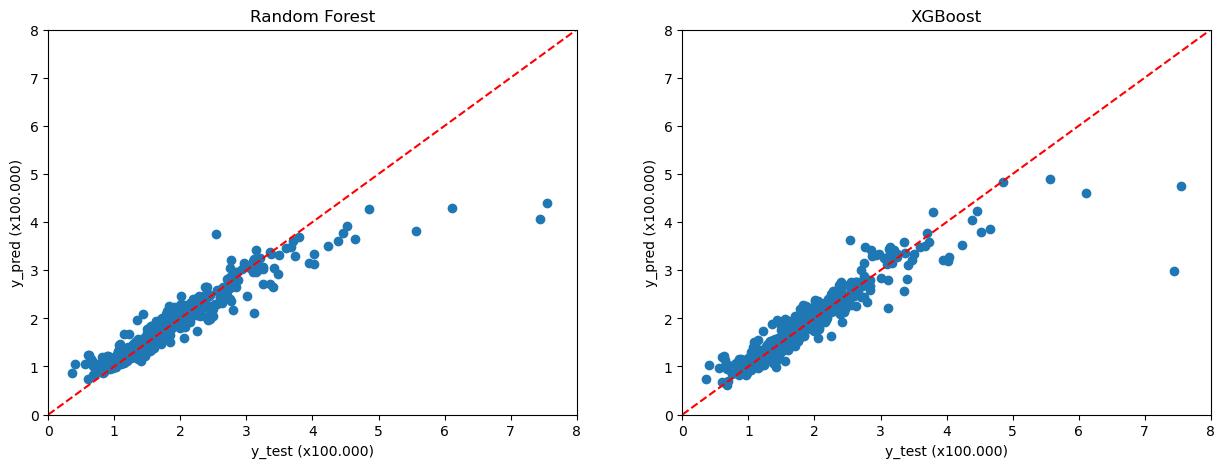

In [76]:
# Criando esse gráfico
fig, ax = plt.subplots(ncols=2,figsize=(15,5))

ax[0].scatter(y_test/100000, y_pred_rf/100000)
ax[0].plot([0,8],[0,8],'--r')

ax[1].scatter(y_test/100000, y_pred_xgb/100000)
ax[1].plot([0,8],[0,8],'--r')

ax[0].set(xlim=(0, 8),ylim=(0, 8))
ax[0].set_xlabel('y_test (x100.000)')
ax[0].set_ylabel('y_pred (x100.000)')
ax[0].set_title('Random Forest')

ax[1].set(xlim=(0, 8),ylim=(0, 8))
ax[1].set_xlabel('y_test (x100.000)')
ax[1].set_ylabel('y_pred (x100.000)')
ax[1].set_title('XGBoost')

plt.show()

## Construindo Previsão
- Utilizando o **Random Forest**

In [77]:
# Fazer a previsão
y_pred = reg_rf_best.predict(teste)

In [78]:
# Adicionando a coluna na base
teste['SalePrice'] = y_pred

In [79]:
# Extraindo as colunas Id e SalePrice
resultado = teste[['Id','SalePrice']]

In [80]:
# Exportando para um csv
# resultado.to_csv('resultado5_1.csv', index=False)

resultado.to_csv('resultado5_2.csv', index=False)

- Tentando fazer a previsão com o XGBoost

In [81]:
# Retirando a coluna SalePrice
teste = teste.drop('SalePrice',axis=1)

In [82]:
# Fazer a previsão
y_pred = reg_xgb_best.predict(teste)

In [83]:
# Adicionando a coluna na base
teste['SalePrice'] = y_pred

In [84]:
# Extraindo as colunas Id e SalePrice
resultado = teste[['Id','SalePrice']]

In [85]:
# Exportando para um csv
# resultado.to_csv('resultado5_11.csv', index=False)

resultado.to_csv('resultado5_22.csv', index=False)

- **Resultado**
<img src="pkgImagens/resultado5.png" width=900>